In [1]:
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sys
import os
import re
import pandas as pd
import numpy as np


In [20]:
testdf = pd.read_csv("test.csv", header=None, delimiter="\t", quoting=3,names=['text2'])
traindf = pd.read_csv("training.csv", header=None, delimiter="\t", quoting=3,names=['sentiment','text1'])

In [21]:
traindf.head()

sentiment                                              text1
0        "1  The Da Vinci Code book is just awesome.",,,,,,...
1        "1  this was the first clive cussler i've ever rea...
2        "1        i liked the Da Vinci Code a lot.",,,,,,,,,,
3        "1        i liked the Da Vinci Code a lot.",,,,,,,,,,
4        "1  I liked the Da Vinci Code but it ultimatly did...

In [22]:
testdf.head()

text2
0  " I don't care what anyone says, I like Hillar...
1   have an awesome time at purdue!..,,,,,,,,,,,,,,,
2  Yep, I'm still in London, which is pretty awes...
3  Have to say, I hate Paris Hilton's behavior bu...
4             i will love the lakers.,,,,,,,,,,,,,,,

In [23]:
traindf.shape

(7086, 2)

In [12]:
testdf.shape

(33052, 1)

In [24]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 2 columns):
sentiment    7086 non-null object
text1        7086 non-null object
dtypes: object(2)
memory usage: 110.8+ KB


In [25]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33052 entries, 0 to 33051
Data columns (total 1 columns):
text2    33052 non-null object
dtypes: object(1)
memory usage: 258.3+ KB


In [26]:
traindf.describe()

sentiment                            text1
count       7086                             7086
unique         2                             1410
top           "1  I love Harry Potter.",,,,,,,,,,
freq        3995                              167

In [27]:
testdf.describe()

text2
count                                               33052
unique                                               8745
top     I need some of that geico balboa stuff..,,,,,,...
freq                                                  321

In [28]:
#to find no. of 0 and no. of 1 
traindf.sentiment.value_counts()

"1    3995
"0    3091
Name: sentiment, dtype: int64

In [31]:
#calculate avearge no. of words per sentence
import numpy as np 
np.mean([len(s.split(" ")) for s in traindf.text1])

10.886819079875812

In [32]:
# CountVectorizer remove punctuations, lowercase,remove stop words, and stem words.
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    stems = stem_tokens(tokens, stemmer)
    return stems
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = tokenize,lowercase = True,stop_words = 'english',max_features = 85)

In [35]:
# fit_transform fits the model and learns the vocabulary.Also it transforms our corpus data into feature vectors. 
corpus_data_features = vectorizer.fit_transform(traindf.text1.tolist() + testdf.text2.tolist())

In [36]:
corpus_data_features_np = corpus_data_features.toarray()
corpus_data_features_np.shape

(40138, 85)

In [38]:
#to print words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['aaa', 'amaz', 'angelina', 'awesom', 'beauti', 'becaus', 'boston', 'brokeback', 'citi', 'code', 'cool', 'cruis', 'd', 'da', 'drive', 'francisco', 'friend', 'fuck', 'geico', 'good', 'got', 'great', 'ha', 'harri', 'harvard', 'hate', 'hi', 'hilton', 'honda', 'imposs', 'joli', 'just', 'know', 'laker', 'left', 'like', 'littl', 'london', 'look', 'lot', 'love', 'm', 'macbook', 'make', 'miss', 'mission', 'mit', 'mountain', 'movi', 'need', 'new', 'oh', 'onli', 'pari', 'peopl', 'person', 'potter', 'purdu', 'realli', 'right', 'rock', 's', 'said', 'san', 'say', 'seattl', 'shanghai', 'stori', 'stupid', 'suck', 't', 'thi', 'thing', 'think', 'time', 'tom', 'toyota', 'ucla', 've', 'vinci', 'wa', 'want', 'way', 'whi', 'work']


In [42]:
#to print the count of each word in vocabulary
dist = np.sum(corpus_data_features_np, axis=0)
for tag, count in zip(vocab, dist):
    print (count, tag)

1179 aaa
485 amaz
1765 angelina
3170 awesom
2145 beauti
1694 becaus
2189 boston
2000 brokeback
423 citi
2003 code
481 cool
2031 cruis
439 d
2007 da
433 drive
1926 francisco
477 friend
452 fuck
1085 geico
772 good
571 got
1178 great
776 ha
2094 harri
2102 harvard
4489 hate
794 hi
2086 hilton
2192 honda
1098 imposs
1764 joli
1054 just
896 know
2019 laker
425 left
4080 like
507 littl
2232 london
811 look
421 lot
10334 love
1568 m
1059 macbook
631 make
1098 miss
1101 mission
1260 mit
2081 mountain
1207 movi
1220 need
459 new
551 oh
674 onli
2094 pari
1018 peopl
453 person
2093 potter
1167 purdu
2126 realli
661 right
475 rock
3914 s
495 said
2038 san
627 say
2019 seattl
1189 shanghai
467 stori
2886 stupid
4614 suck
1455 t
1705 thi
662 thing
1523 think
781 time
2117 tom
2028 toyota
2008 ucla
774 ve
2001 vinci
3703 wa
1656 want
932 way
547 whi
512 work


In [43]:
from nltk.corpus import stopwords
print(set(stopwords.words("english")))

{'won', 'not', 'by', 'we', 'during', 'why', 'be', "don't", 'an', 'again', 'couldn', 'herself', "that'll", 'some', 'more', 'most', "shan't", "hasn't", 'his', "shouldn't", "isn't", 'is', 'wasn', 'below', 'other', 'having', 'being', 'up', 'each', 'these', "doesn't", 'before', 'both', 'have', 'o', 'when', 'to', 'own', 'should', 'but', 'their', 'such', 'only', 'just', 'i', 'are', 'myself', 'as', 'was', 'very', 'mustn', 'yours', 'shan', "you'll", 'shouldn', 'yourselves', 'hadn', 'm', 'of', 'didn', 'the', 'any', 'himself', "she's", 'who', 'its', "hadn't", "haven't", "needn't", 'this', 'itself', 'then', 'wouldn', 'under', 'where', 'with', "couldn't", 'a', 'out', 'needn', 'my', "it's", 'weren', 'there', 'between', 'after', "you'd", "should've", "wasn't", 'here', 'too', 'because', 'ourselves', 'did', 'does', 'through', 'he', 'for', 'above', 'do', "didn't", 'until', 'now', 'ain', 'that', 'mightn', 'y', 'which', "you've", 've', 'her', 'they', "mustn't", 'if', "aren't", 'isn', 'once', 'it', 'him', 

In [94]:
#The class FreqDist  works like a dictionary where the keys are the words in the text and the values are the count associated with that word.
from nltk.book import *
print("\n\n\n")
freqDist = FreqDist(text1)
print(freqDist)





<FreqDist with 19317 samples and 260819 outcomes>


In [95]:
print(freqDist['good'])

192


In [96]:
print(freqDist["amazing"])

6


In [97]:
print(freqDist["man"])

508


In [98]:
# it returns the class dict_keys i'e a list of all the words in your text1
words = freqDist.keys()
print(type(words))
print(words)
 

<class 'dict_keys'>
dict_keys(['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'Grammar', 'School', ')', 'The', 'pale', '--', 'threadbare', 'in', 'coat', ',', 'heart', 'body', 'and', 'brain', ';', 'I', 'see', 'him', 'now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'all', 'the', 'gay', 'flags', 'of', 'known', 'nations', 'world', 'loved', 'dust', 'it', 'somehow', 'mildly', 'reminded', 'mortality', '"', 'While', 'you', 'take', 'hand', 'school', 'others', 'teach', 'them', 'what', 'name', 'whale', '-', 'fish', 'is', 'be', 'called', 'our', 'tongue', 'leaving', 'out', 'through', 'ignorance', 'letter', 'H', 'which', 'almost', 'alone', 'maketh', 'signification', 'word', 'deliver', 'that', 'not', 'true', '."', 'HACKLUYT', 'WHALE', '...', 'Sw', 'Dan', 'HVAL', 'This', 'animal', 'named', 'from', 'roundness', 'or', 'rolli

In [99]:
print(len(words))
 

19317


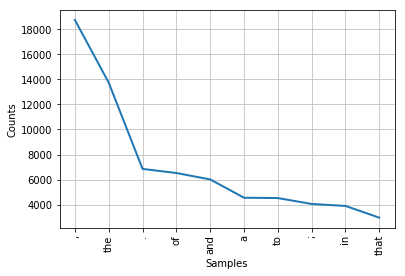

In [100]:
#displays the most 10 used words 
freqDist.plot(10)

In [101]:
from nltk.book import *
print("\n\n\n")
freqDist = FreqDist(text2)
print(freqDist)





<FreqDist with 6833 samples and 141576 outcomes>


In [102]:
print(freqDist['good'])

166


In [103]:
print(freqDist["amazing"])

1


In [104]:
# it returns the class dict_keys i'e a list of all the words in your text2
words = freqDist.keys()
print(type(words))
print(words)
 

<class 'dict_keys'>
dict_keys(['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'their', 'residence', 'at', 'Norland', 'Park', 'the', 'centre', 'property', 'where', 'for', 'many', 'generations', 'they', 'lived', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'general', 'good', 'opinion', 'surrounding', 'acquaintance', 'late', 'owner', 'this', 'single', 'man', 'who', 'very', 'advanced', 'age', 'years', 'his', 'life', 'constant', 'companion', 'housekeeper', 'sister', 'But', 'her', 'death', 'which', 'happened', 'ten', 'before', 'own', 'produced', 'great', 'alteration', 'home', ';', 'supply', 'loss', 'he', 'invited', 'received', 'into', 'house', 'nephew', 'Mr', 'Henry', 'legal', 'inheritor', 'person', 'whom', 'intended', 'bequeath', 'it', 'In', 'society', 'niece', 'children', 'old', 'Gentleman', "'", 's', 'days'

In [105]:
print(len(words))
 

6833


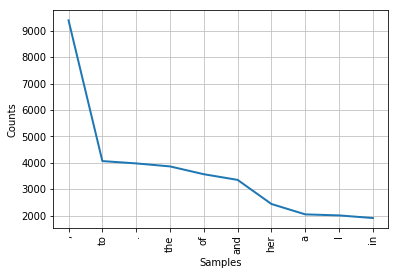

In [106]:
#displays the most 10 used words 
freqDist.plot(10)

In [107]:
#to divide the words into categories
from nltk import ConditionalFreqDist
from nltk.corpus import brown

In [108]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [109]:
print(brown.raw(categories="lore"))



	In/in American/jj romance/nn ,/, almost/rb nothing/pn rates/vbz higher/rbr than/cs what/wdt the/at movie/nn men/nns have/hv called/vbn ``/`` meeting/vbg cute/jj ''/'' --/-- that/dt is/bez ,/, boy-meets-girl/nn seems/vbz more/ql adorable/jj if/cs it/pps doesn't/doz* take/vb place/nn in/in an/at atmosphere/nn of/in correct/jj and/cc acute/jj boredom/nn ./.
Just/ql about/rb the/at most/ql enthralling/jj real-life/nn example/nn of/in meeting/vbg cute/jj is/bez the/at Charles/np MacArthur-Helen/np Hayes/np saga/nn :/: reputedly/rb all/abn he/pps did/dod was/bedz give/vb her/ppo a/at handful/nn of/in peanuts/nns ,/, but/cc he/pps said/vbd simultaneously/rb ,/, ``/`` I/ppss wish/vb they/ppss were/bed emeralds/nns ''/'' ./.
Aside/rb from/in the/at comico-romantico/jj content/nn here/rb ,/, a/at good/jj linguist-anthropologist/nn could/md readily/rb pick/vb up/rp a/at few/ap other/ap facts/nns ,/, especially/rb if/cs he/pps had/hvd a/at little/ql more/ap of/in the/at conversation/nn to/to go

In [110]:
print(brown.raw(categories="mystery"))



	There/ex were/bed thirty-eight/cd patients/nns on/in the/at bus/nn the/at morning/nn I/ppss left/vbd for/in Hanover/np ,/, most/ap of/in them/ppo disturbed/vbn and/cc hallucinating/vbg ./.
An/at interne/nn ,/, a/at nurse/nn and/cc two/cd attendants/nns were/bed in/in charge/nn of/in us/ppo ./.


	I/ppss felt/vbd lonely/jj and/cc depressed/vbd as/cs I/ppss stared/vbd out/in the/at bus/nn window/nn at/in Chicago's/np$ grim/jj ,/, dirty/jj West/jj-tl Side/nn-tl ./.
It/pps seemed/vbd incredible/jj ,/, as/cs I/ppss listened/vbd to/in the/at monotonous/jj drone/nn of/in voices/nns and/cc smelled/vbd the/at fetid/jj odors/nns coming/vbg from/in the/at patients/nns ,/, that/cs technically/rb I/ppss was/bedz a/at ward/nn of/in the/at state/nn of/in Illinois/np ,/, going/vbg to/in a/at hospital/nn for/in the/at mentally/rb ill/jj ./.


	I/ppss suddenly/rb thought/vbd of/in Mary/np Jane/np Brennan/np ,/, the/at way/nn her/pp$ pretty/jj eyes/nns could/md flash/vb with/in anger/nn ,/, her/pp$ qu

In [111]:
pair_list = [(category, word) for category in brown.categories() for word in brown.words(categories=category)]

In [112]:
#to get the 10 pairs of words with the associated category
print(pair_list[:20])
 

[('adventure', 'Dan'), ('adventure', 'Morgan'), ('adventure', 'told'), ('adventure', 'himself'), ('adventure', 'he'), ('adventure', 'would'), ('adventure', 'forget'), ('adventure', 'Ann'), ('adventure', 'Turner'), ('adventure', '.'), ('adventure', 'He'), ('adventure', 'was'), ('adventure', 'well'), ('adventure', 'rid'), ('adventure', 'of'), ('adventure', 'her'), ('adventure', '.'), ('adventure', 'He'), ('adventure', 'certainly'), ('adventure', "didn't")]


In [113]:
#create a ConditionalFreqDist  object.
freqDist = ConditionalFreqDist(pair_list)

In [114]:
#to see how many times the word “the” occur in the category “lore”
print(freqDist["lore"]["the"])

6328


In [115]:
#If you want to know the conditions that are being applied in your conditional frequency distribution
print(freqDist.conditions())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [116]:
#With tabulate function we can count how many times a given word occurs in certain categories and display it in a tabular format
category = ["adventure", "lore", "news"]
samples = ["the", "and", "man"]
freqDist.tabulate(conditions=category, samples=samples)

           the  and  man 
adventure 3370 1622  165 
     lore 6328 2758   88 
     news 5580 2146   72 


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopset=set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [122]:
y =traindf.sentiment

In [120]:
x=vectorizer.fit_transform(traindf.text1)

In [126]:
print(y.shape)

(7086,)


In [125]:
print(x.shape)

(7086, 2011)


In [127]:
#Naives bayes classifier
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score


In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42)

In [129]:
#train our naive bayes clasdsifier
nclf = naive_bayes.MultinomialNB()
nclf.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [130]:
roc_auc_score(ytest,nclf.predict_proba(xtest)[:,1])

0.9985212006757996

In [139]:
ypred = nclf.predict(xtest)

In [152]:
from sklearn.metrics import accuracy_score
nas=accuracy_score(ytest, ypred)
nas

0.9785553047404063

In [143]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[ 733   26]
 [  12 1001]]


In [144]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          "0       0.98      0.97      0.97       759
          "1       0.97      0.99      0.98      1013

   micro avg       0.98      0.98      0.98      1772
   macro avg       0.98      0.98      0.98      1772
weighted avg       0.98      0.98      0.98      1772



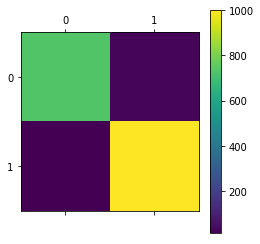

In [151]:
ncmat=confusion_matrix(ytest, ypred)
plt.matshow(ncmat)
plt.colorbar()

In [178]:
import numpy as np
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42)


In [180]:
from sklearn.linear_model import LogisticRegression
    
log_model = LogisticRegression()
log_model = log_model.fit(X=xtrain, y=ytrain)

In [181]:
y_pred = log_model.predict(xtest)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

          "0       0.99      0.99      0.99       759
          "1       0.99      0.99      0.99      1013

   micro avg       0.99      0.99      0.99      1772
   macro avg       0.99      0.99      0.99      1772
weighted avg       0.99      0.99      0.99      1772



In [184]:
corpus_data_features_np.shape

(40138, 10175)

In [185]:
#predicting my testfile using logistic regression
log_model = LogisticRegression()
log_model = log_model.fit(X=corpus_data_features_np[0:len(traindf)], y=traindf.sentiment)

In [186]:
#predicting my test file
test_pred = log_model.predict(corpus_data_features_np[len(traindf):])

In [191]:
# sample some of them
import random
spl = random.sample(range(len(test_pred)), 15)
for text2, sentiment in zip(testdf.text2[spl], test_pred[spl]):
    print (sentiment, text2)

"0 Stupid UCLA.,,,,,,,,,,,,,,,
"0 lost a friend recently, Chris Handy, it isnt going to be the same without seeing him tooling around clinton in crappy Honda, with a header..(,,,,,,,,,,,,
"0 cause obviously toyota dealer is cheating on my feelings..,,,,,,,,,,,,,,,
"1 AAA rocks.,,,,,,,,,,,,,,,
"0 London still sucks...,,,,,,,,,,,,,,,
"1 i love shanghai too =).,,,,,,,,,,,,,,,
"0 "Along the sides of exit fly-over there were parallel parking spots for "" attractive cars only "" — the sign listed several criteria of which my crappy Honda qualified for none.",,,,,,,,,,,,,,,
"1 Boston's been awesome.,,,,,,,,,,,,,,,
"0 God bless American Airlines..,,,,,,,,,,,,,,,
"0 I hate Tom Cruise..,,,,,,,,,,,,,,,
"1 I want Hillary Clinton.,,,,,,,,,,,,,,,
"1 Oh my god I LOVE Pommes mit Mayo.,,,,,,,,,,,,,,,
"1 Often I would find myself on a great site like citi trust finance company and bookmark it as a great resource.,,,,,,,,,,,,,,,
"0 Set in London's delightful canal district Little Venice, The Colonnade Ho

In [192]:
#predicting my testfile using naive bayes classifier
nclf = naive_bayes.MultinomialNB()
nclf.fit(X=corpus_data_features_np[0:len(traindf)], y=traindf.sentiment)
test_pred = nclf.predict(corpus_data_features_np[len(traindf):])
import random
spl = random.sample(range(len(test_pred)), 15)
for text2, sentiment in zip(testdf.text2[spl], test_pred[spl]):
    print (sentiment, text2)

"0 harvard is dumb, i mean they really have to be stupid to have not wanted her to be at their school.,,,,,,,,,,,,,,
"0 I know you're way too smart and way too cool to let stupid UCLA get to you...,,,,,,,,,,,,,,,
"1 i love his new augustus macBook!,,,,,,,,,,,,,,,
"1 cause obviously toyota dealer is cheating on my feelings..,,,,,,,,,,,,,,,
"0 seattle sucks!!!...,,,,,,,,,,,,,,,
"0 boston kinda sucked, but my cousin erica in connecticut and my auntie pearl and uncle milin were cool.,,,,,,,,,,,,,,
"1 With that said god i cant wait to go there, seattle is awesome.,,,,,,,,,,,,,,
"1 "She also said she didnt miss her Thanksgiving because Geico was so great and he goes "" MASHED POTATOES AND CRANBERRY SAUCE!!!!",,,,,,,,,,,,,,,
"1 and honda elements are assholes...,,,,,,,,,,,,,,,
"0 I hate the Lakers...,,,,,,,,,,,,,,,
"1 Which makes me think I need AAA more than AA...,,,,,,,,,,,,,,,
"0 i hate the Lakers too but this isn't a basketball blog, so i won't go into it).,,,,,,,,,,,,,,
"1 The seattle sc

In [200]:
from sklearn.linear_model import LogisticRegression
    
log_model = LogisticRegression()
log_model = log_model.fit(X=xtrain, y=ytrain)

In [198]:
ypred = log_model.predict(xtest)

In [199]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[ 749   10]
 [   8 1005]]


In [201]:
roc_auc_score(ytest,log_model.predict_proba(xtest)[:,1])

0.9996995579209408

In [202]:
from sklearn.metrics import accuracy_score
las=accuracy_score(ytest, ypred)
las

0.989841986455982

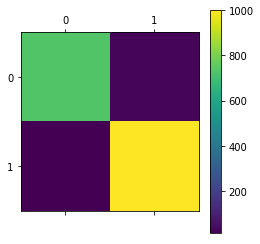

In [203]:
lcmat=confusion_matrix(ytest, ypred)
plt.matshow(ncmat)
plt.colorbar()

In [204]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

          "0       0.99      0.99      0.99       759
          "1       0.99      0.99      0.99      1013

   micro avg       0.99      0.99      0.99      1772
   macro avg       0.99      0.99      0.99      1772
weighted avg       0.99      0.99      0.99      1772

